In [2]:
import torch
import numpy as np

from torch_geometric.loader import DataLoader
from MoleculeDataset import MoleculeDataset
from sklearn.metrics import accuracy_score, precision_score, f1_score
from GNNClassifier import GNNClassifier

from Experiment import train_model, plot_metrics, inference_model
from torch.optim import lr_scheduler
from scipy.optimize import brentq
import matplotlib.pyplot as plt

In [3]:
# load the data
train_data = MoleculeDataset(data_split = "train")
val_data = MoleculeDataset(data_split = "valid")
test_data = MoleculeDataset(data_split = "test")
cal_data = MoleculeDataset(data_split = "cal")

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1, shuffle=False)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)
cal_loader = DataLoader(cal_data, batch_size=1, shuffle=False)

Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:11<00:00, 1219.80it/s]
Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:10<00:00, 1266.49it/s]
Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:10<00:00, 1285.62it/s]
Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:10<00:00, 1320.75it/s]


<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cData

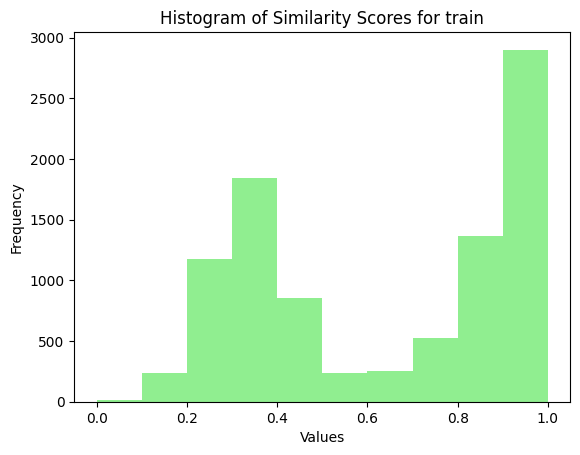

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cData

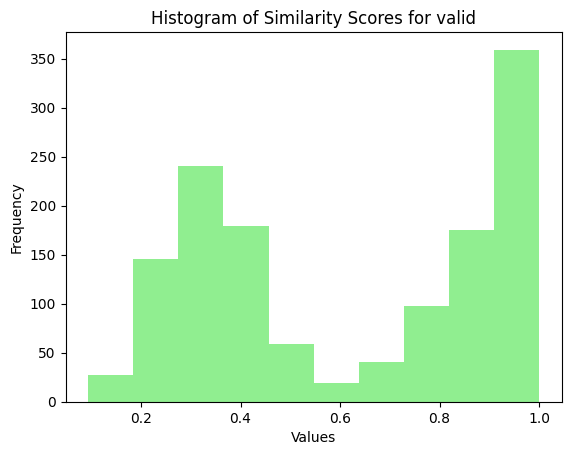

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cData

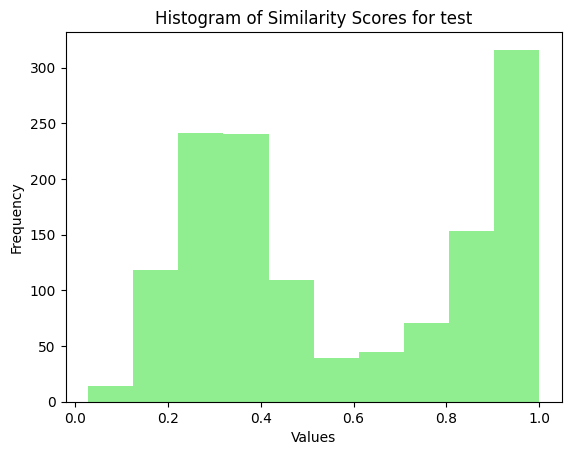

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'rdkit.DataStructs.cData

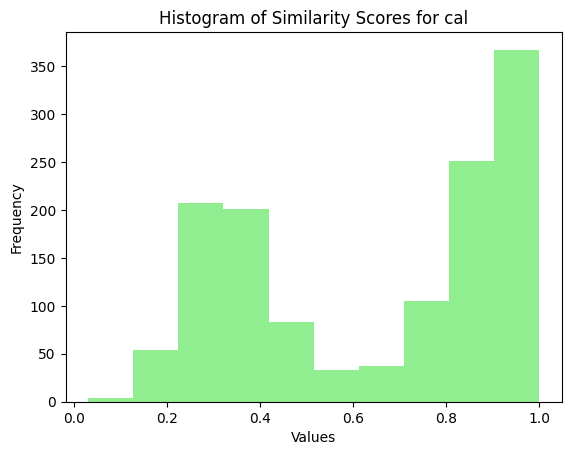

In [3]:
# assess the similarity of the structures of the molecules within each data split
# there is a bug in this code that makes the molecules appear identitical ( values of 1)
# this is because the similarities of each individual molecule is currently being calculated
train_data.plot_similarity()

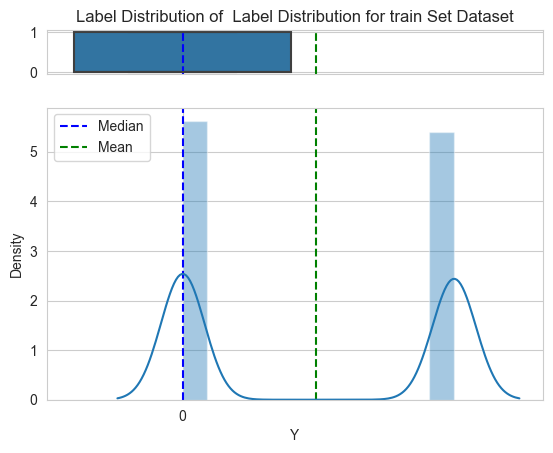

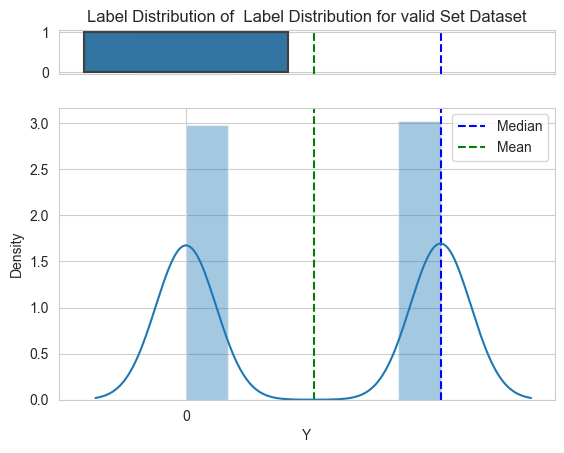

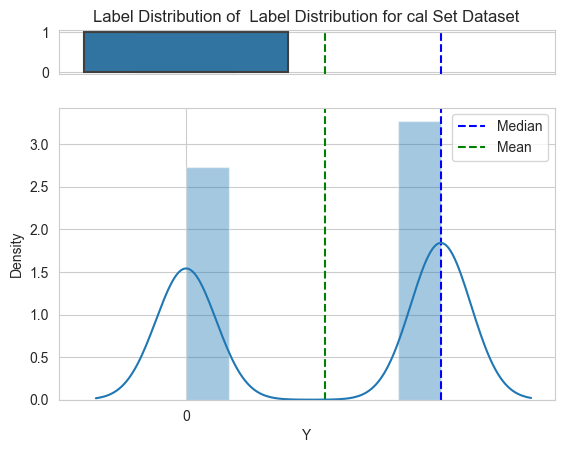

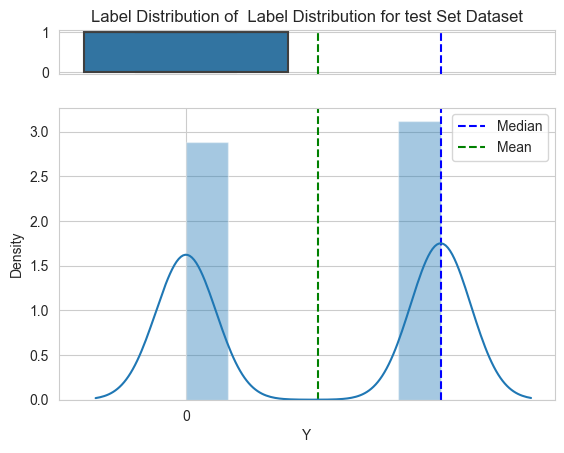

In [3]:
# prepare and save the figures for the class distributions
train_data.plot_labels("figures")
val_data.plot_labels("figures")
cal_data.plot_labels("figures")
test_data.plot_labels("figures")

## Train the Models

In [4]:
layer_names = ["GCN", "GAT", "GraphConv"]

model_dict = {}
model_results = {}

# create models
for layer in layer_names:
    # num heads only applies to GAT model
    model_dict[layer] = GNNClassifier(79, 1024, 1, layer, num_heads = 3)

In [13]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [5]:
# get the number of trainable parameters for each model:
for name, model in model_dict.items():
    pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(name, " : ", pytorch_total_params)


GCN  :  1132545
GAT  :  1136641
GraphConv  :  2262017


Epoch 0/99
----------
train Loss: 0.6853 ROC AUC: 0.5904
val Loss: 0.6810 ROC AUC: 0.6555
Epoch 1/99
----------
train Loss: 0.6649 ROC AUC: 0.6579
val Loss: 0.6626 ROC AUC: 0.6511
Epoch 2/99
----------
train Loss: 0.6486 ROC AUC: 0.6716
val Loss: 0.6535 ROC AUC: 0.6588
Epoch 3/99
----------
train Loss: 0.6378 ROC AUC: 0.6815
val Loss: 0.6459 ROC AUC: 0.6755
Epoch 4/99
----------
train Loss: 0.6300 ROC AUC: 0.6934
val Loss: 0.6460 ROC AUC: 0.6871
Epoch 5/99
----------
train Loss: 0.6247 ROC AUC: 0.7018
val Loss: 0.6315 ROC AUC: 0.6997
Epoch 6/99
----------
train Loss: 0.6195 ROC AUC: 0.7095
val Loss: 0.6268 ROC AUC: 0.7079
Epoch 7/99
----------
train Loss: 0.6172 ROC AUC: 0.7126
val Loss: 0.6240 ROC AUC: 0.7131
Epoch 8/99
----------
train Loss: 0.6148 ROC AUC: 0.7162
val Loss: 0.6203 ROC AUC: 0.7193
Epoch 9/99
----------
train Loss: 0.6141 ROC AUC: 0.7160
val Loss: 0.6194 ROC AUC: 0.7214
Epoch 10/99
----------
train Loss: 0.6106 ROC AUC: 0.7217
val Loss: 0.6382 ROC AUC: 0.7227
Epoch 11/

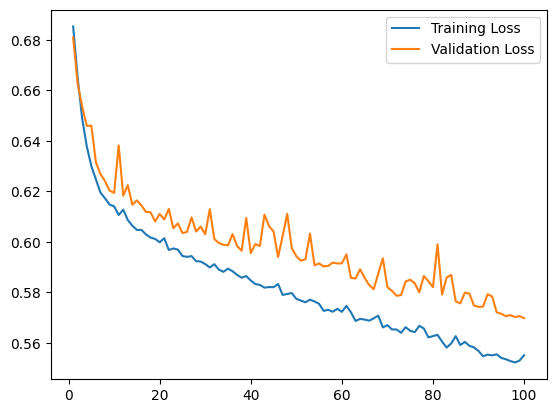

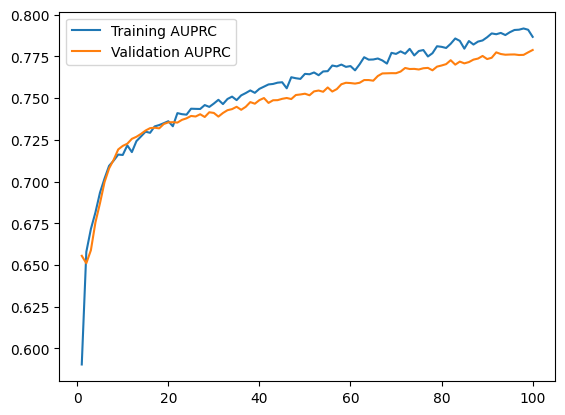

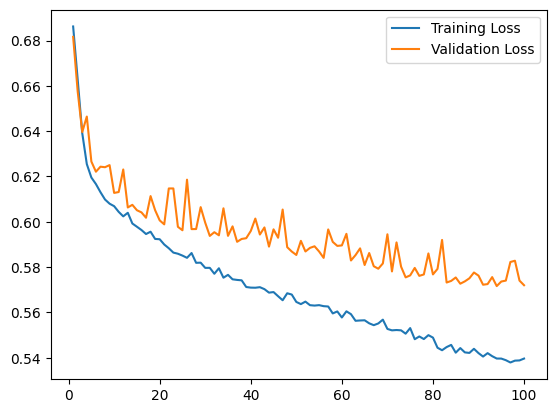

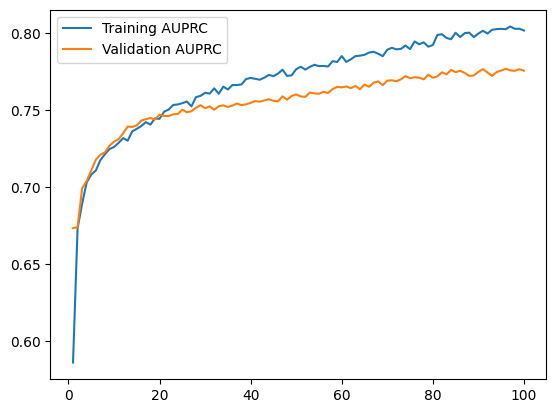

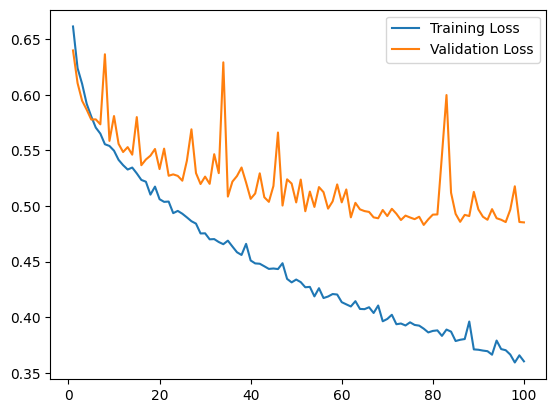

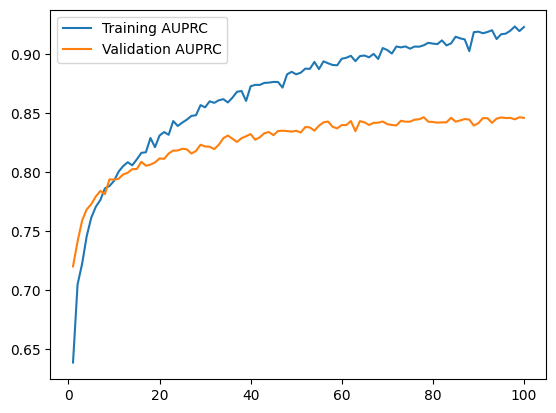

In [5]:
criterion = torch.nn.BCELoss()

datasets = {'train': train_loader,
            'val': val_loader}

datasets_sizes = {
    'train': len(train_data),
    'val': len(val_data)
}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for name, model in model_dict.items():
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=.001)
    # Decay learning rate by a factor of 0.01 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.01)

    model_out, optimizer, best_acc, best_loss, train_auprc, train_loss, val_auprc, val_loss = train_model(model,
                                                                                                  criterion,
                                                                                                  optimizer,
                                                                                                  exp_lr_scheduler,
                                                                                                  datasets,
                                                                                                  datasets_sizes,
                                                                                                  device,
                                                                                                  track_out=True,
                                                                                                  num_epochs=100)

    model_dict[name] = model_out
    model_results[name] = {
        'Train AUPRC': train_auprc,
        'Val AUPRC': val_auprc,
        'Train Loss': train_loss,
        'Val Loss': val_loss
    }

    # save model weights
    torch.save(model.state_dict(), r'weights/' + name + '_100.pt')

    # save metrics
    plot_metrics(train_loss, val_loss, train_auprc, val_auprc, save = r'figures/' + name)

## Run Conformal Risk Procedure

In [5]:

load = False
# load in pretrained weights if they are not loaded already
if load:
    for name, model in model_dict.items():
        model.load_state_dict(torch.load('weights/' + name + "_100.pt"))

        model_dict[name] = model

In [6]:
# perform conformal inference

# Problem setup
alpha = 0.1 # 1-alpha is the desired false negative rate

n = len(cal_data)

def false_negative_rate(pred_masks, true_masks):
    return 1-((pred_masks * true_masks).sum().sum()/true_masks.sum().sum()).mean()

def lamhat_threshold(lam): return false_negative_rate(cal_probs >=lam, cal_gt) - ((n+1)/n*alpha - 1/(n+1))

conformal_res = {}

cal_scores = []
cal_gts = []

for name, model in model_dict.items():
    cal_probs, cal_gt = inference_model(model, cal_loader)

    # Run the conformal risk control procedure
    cal_probs = np.array(cal_probs)
    cal_gt = np.array(cal_gt)

    cal_scores.append(cal_probs)
    cal_gts.append(cal_gt)

    lamhat = brentq(lamhat_threshold, 0, 1)

    conformal_res[name] = lamhat

In [9]:
import seaborn as sns
from scipy.stats import beta

def plot_coverage(coverages, filename, names, n, l):

    f, axs = plt.subplots(nrows = 1, ncols = 3, sharex=True, figsize = (20, 5))

    for i, coverage in enumerate(coverages):

        mean = np.mean(coverage)

        # empirical quantiles
        lower_quant = np.quantile(coverage, 0.05)
        upper_quant =np.quantile(coverage, 0.95)

        # expected quantile from beta distribution
        lower_exp = beta.ppf(0.05,n + 1 - l,l)
        upper_exp = beta.ppf(0.95,n + 1 - l,l)


        axs[i].axvline(mean, color='g', linestyle='--')

        axs[i].axvline(lower_quant, color = 'b', linestyle='-')

        axs[i].axvline(lower_exp, color = 'r', linestyle='-')
        axs[i].axvline(upper_exp, color = 'r', linestyle='-')

        axs[i].legend({'Mean':mean, 'Empirical Quantile': upper_quant, 'Beta Quantile': upper_exp})

        axs[i].axvline(upper_quant, color = 'b', linestyle='-')
        sns.distplot(coverage, ax = axs[i], label =None)

        axs[i].set(title = names[i] + " Coverage",xlabel='')

    plt.savefig(filename)

### Validate distribution of coverages

In [7]:
# check conformal inference coverage
i = 0
coverage_list = []
for name, model in model_dict.items():

    # get validation results
    val_probs, val_gt = inference_model(model, val_loader)

    scores = np.concatenate([np.array(val_probs), cal_scores[i]])

    gt = np.concatenate([np.array(val_gt), cal_gts[i]])

    n = len(cal_data)

    alpha = 0.1

    R = 10000

    coverages = np.zeros((R,))

    for r in range(R):
        np.random.shuffle(scores)
        temp_calib_scores, temp_val_scores = (scores[:n], scores[n:])
        qhat = np.quantile(temp_calib_scores, np.ceil((n + 1)*(1 - alpha))/n, interpolation = 'higher')
        coverages[r] = (temp_val_scores <= qhat).astype(float).mean()

    coverage_list.append(coverages)
    i += 1




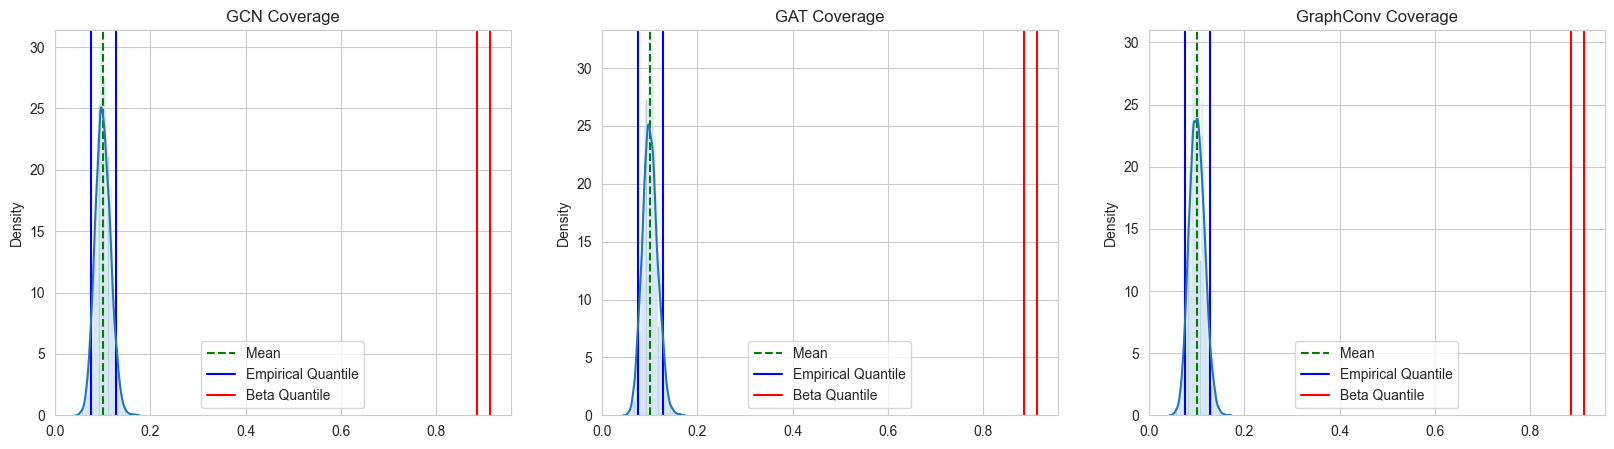

In [10]:
l = np.floor((n + 1)*alpha)
plot_coverage(coverage_list,
              filename = 'figures/coverages.png',
              names = ["GCN", "GAT", "GraphConv"],
              n =n,
              l = l)

## Generate Metrics using threshold found using conformal risk procedure

In [24]:
test_data = MoleculeDataset(transform = None, data_split = "test")
test_loader = DataLoader(train_data, batch_size=1, shuffle=False)

test_results = {}

for name, model in model_dict.items():
    test_probs, test_gt = inference_model(model, cal_loader)

    test_probs = np.array(test_probs)
    test_gt = np.array(test_gt)

    predicted_mols = test_probs >= conformal_res[name]

    # Calculate empirical FNR
    test_results[name] = {
        "FNR": false_negative_rate(predicted_mols, test_gt),
        "Accuracy": accuracy_score(test_gt, predicted_mols),
        "Precision": precision_score(test_gt, predicted_mols),
        "F1": f1_score(test_gt, predicted_mols)
    }


Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:09<00:00, 1388.02it/s]
 Oversample of minority class is used. 


In [25]:
# note that these outputs are 0.099 instead of 0.1 to be conservative
# as discussed in A Gentle Introduction to Conformal Inference
for name, res in test_results.items():
    print(name)
    print(res)

GCN
{'FNR': 0.09930616617202759, 'Accuracy': 0.6707757704569607, 'Precision': 0.6114218428024728, 'F1': 0.7283885674206558}
GAT
{'FNR': 0.09930616617202759, 'Accuracy': 0.6704569606801275, 'Precision': 0.6111519788141827, 'F1': 0.728197037426593}
GraphConv
{'FNR': 0.09930616617202759, 'Accuracy': 0.8336875664187035, 'Precision': 0.7895837293290249, 'F1': 0.8414868834194267}


In [26]:
print(conformal_res)

{'GCN': 0.3412226587533847, 'GAT': 0.34210424125151084, 'GraphConv': 0.46471627056520315}
